In [5]:
!pip install seaborn

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


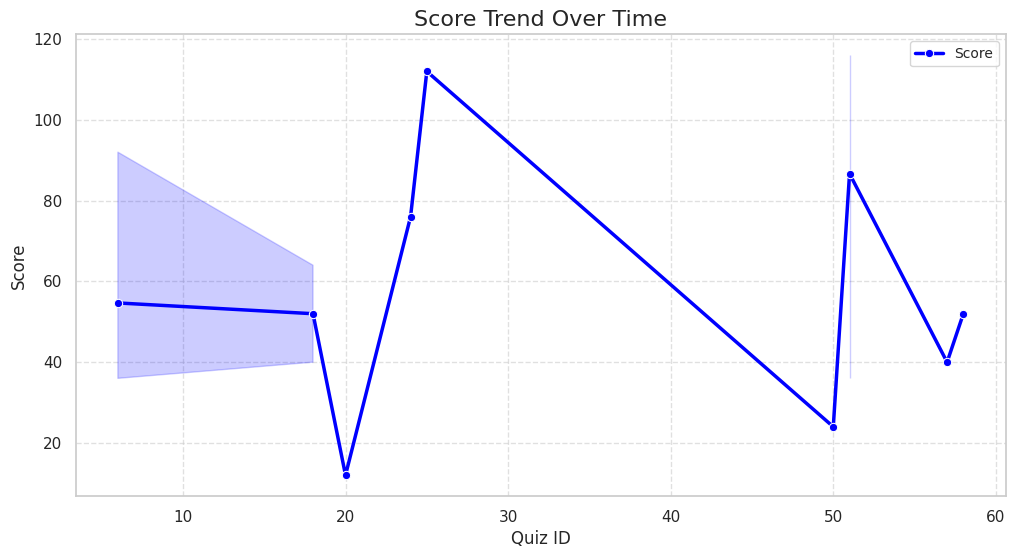

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


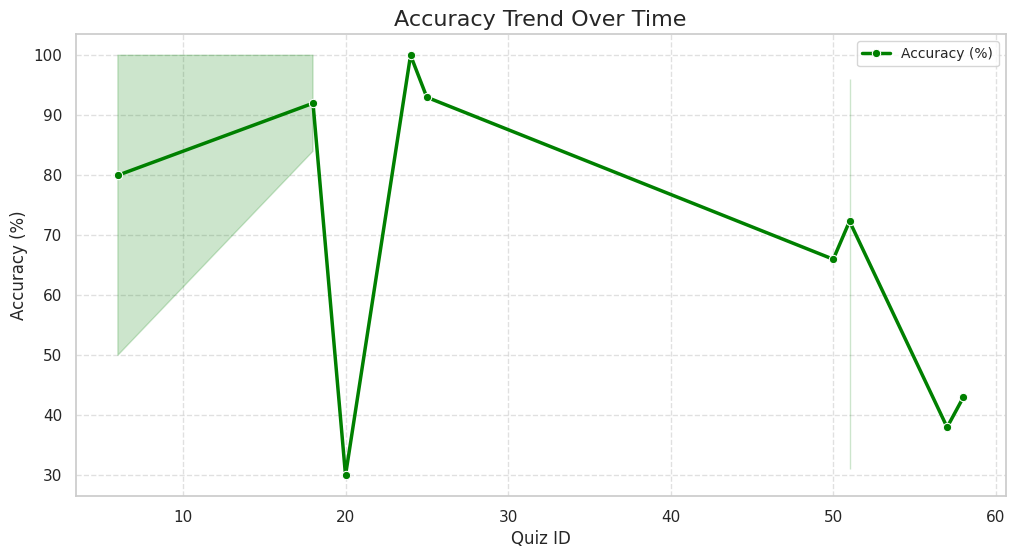

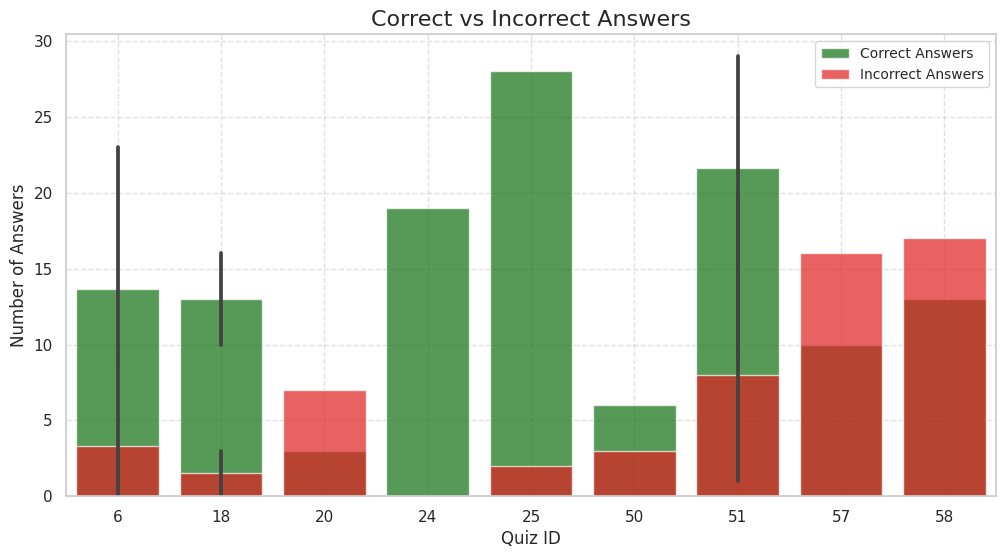

=== Current Quiz Insights ===
Correct Answers: 8
Incorrect Answers: 2
Accuracy (%): 80.0
Final Score: 30.0
Negative Score: 2.0
Topic Analysis: {'structural organisation in animals ': {'correct': 0, 'incorrect': 128, 'accuracy': 0.0}}

=== Historical Trends ===
Average Score: 60.29
Average Accuracy (%): 72.21
Average Negative Score: 5.86
Average Correct Answers: 15.07
Average Incorrect Answers: 5.86

=== Personalized Recommendations ===
- You are losing marks due to negative marking. Avoid guessing on difficult questions.
- Improve your accuracy in the topic 'structural organisation in animals ' by practicing more questions.
- Take mock tests regularly to improve time management and reduce mistakes.

=== Student Persona ===
Persona: Balanced Learner


In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load Data
# -----------------------------

# File paths
quiz_submission_file = "/kaggle/input/json-files/quizsubmission.json"
historical_data_file = "/kaggle/input/json-files/historicaldata.json"
quiz_endpoint_file = "/kaggle/input/json-files/quizendpoint.json"

# Load JSON files
with open(quiz_submission_file, 'r') as f:
    quiz_submission_data = json.load(f)

with open(historical_data_file, 'r') as f:
    historical_data = json.load(f)

with open(quiz_endpoint_file, 'r') as f:
    quiz_endpoint_data = json.load(f)

# -----------------------------
# 2. Analyze Current Quiz Data
# -----------------------------

def analyze_current_quiz(quiz_submission, quiz_endpoint):
    """
    Analyze the latest quiz submission and provide insights.
    """
    insights = {}
    correct_answers = quiz_submission["correct_answers"]
    incorrect_answers = quiz_submission["incorrect_answers"]
    total_questions = quiz_submission["total_questions"]
    accuracy = float(quiz_submission["accuracy"].replace("%", ""))
    final_score = float(quiz_submission["final_score"])
    
    # Basic insights
    insights["Correct Answers"] = correct_answers
    insights["Incorrect Answers"] = incorrect_answers
    insights["Accuracy (%)"] = accuracy
    insights["Final Score"] = final_score
    insights["Negative Score"] = float(quiz_submission["negative_score"])
    
    # Access the nested 'questions' key under 'quiz'
    questions = quiz_endpoint.get("quiz", {}).get("questions", [])
    
    # Analyze by topic
    topic_analysis = {}
    for question in questions:
        topic = question.get("topic", "Unknown")
        question_id = question.get("id")
        # Check if the question was answered correctly
        is_correct = (
            question_id in quiz_submission["response_map"]
            and quiz_submission["response_map"][question_id] == question["options"][2]["id"]
        )
        if topic not in topic_analysis:
            topic_analysis[topic] = {"correct": 0, "incorrect": 0}
        if is_correct:
            topic_analysis[topic]["correct"] += 1
        else:
            topic_analysis[topic]["incorrect"] += 1

    # Calculate accuracy for each topic
    for topic, stats in topic_analysis.items():
        total = stats["correct"] + stats["incorrect"]
        stats["accuracy"] = (stats["correct"] / total) * 100 if total > 0 else 0
    
    insights["Topic Analysis"] = topic_analysis
    return insights

current_quiz_insights = analyze_current_quiz(quiz_submission_data, quiz_endpoint_data)

# -----------------------------
# 3. Analyze Historical Quiz Data
# -----------------------------

def analyze_historical_quizzes(historical_data):
    """
    Analyze the user's historical quiz data to identify trends and weak areas.
    """
    records = []
    for submission in historical_data:
        accuracy = float(submission["accuracy"].replace("%", ""))
        records.append({
            "Quiz ID": submission["quiz_id"],
            "Score": submission["score"],
            "Accuracy": accuracy,
            "Correct Answers": submission["correct_answers"],
            "Incorrect Answers": submission["incorrect_answers"],
            "Final Score": float(submission["final_score"]),
            "Negative Score": float(submission["negative_score"]),
            "Mistakes Corrected": submission["mistakes_corrected"],
            "Initial Mistake Count": submission["initial_mistake_count"]
        })
    
    df = pd.DataFrame(records)
    
    # Calculate trends
    trends = {
        "Average Score": df["Score"].mean(),
        "Average Accuracy (%)": df["Accuracy"].mean(),
        "Average Negative Score": df["Negative Score"].mean(),
        "Average Correct Answers": df["Correct Answers"].mean(),
        "Average Incorrect Answers": df["Incorrect Answers"].mean(),
    }
    
    return df, trends

historical_df, historical_trends = analyze_historical_quizzes(historical_data)

# -----------------------------
# 4. Visualization
# -----------------------------

import seaborn as sns

def preprocess_data(df):
    """
    Replace any inf or -inf values with NaN in the DataFrame.
    """
    df = df.replace([float("inf"), float("-inf")], pd.NA)
    return df

# Preprocess historical data to handle inf values
historical_df = preprocess_data(historical_df)

# Updated Visualization Function
def plot_historical_performance(df):
    """
    Plot historical quiz performance trends with a modern aesthetic style.
    """
    import seaborn as sns
    sns.set_theme(style="whitegrid", palette="pastel")

    # Score Trend
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Quiz ID", y="Score", data=df, marker='o', color='blue', label='Score', linewidth=2.5)
    plt.title("Score Trend Over Time", fontsize=16)
    plt.xlabel("Quiz ID", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(fontsize=10)
    plt.show()
    
    # Accuracy Trend
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Quiz ID", y="Accuracy", data=df, marker='o', color='green', label='Accuracy (%)', linewidth=2.5)
    plt.title("Accuracy Trend Over Time", fontsize=16)
    plt.xlabel("Quiz ID", fontsize=12)
    plt.ylabel("Accuracy (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(fontsize=10)
    plt.show()

    # Correct vs Incorrect Answers
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Quiz ID", y="Correct Answers", data=df, color="green", label="Correct Answers", alpha=0.7)
    sns.barplot(x="Quiz ID", y="Incorrect Answers", data=df, color="red", label="Incorrect Answers", alpha=0.7)
    plt.title("Correct vs Incorrect Answers", fontsize=16)
    plt.xlabel("Quiz ID", fontsize=12)
    plt.ylabel("Number of Answers", fontsize=12)
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()



historical_df = preprocess_data(historical_df)
plot_historical_performance(historical_df)


# -----------------------------
# 5. Generate Recommendations
# -----------------------------

def generate_recommendations(current_insights, trends):
    """
    Generate personalized recommendations based on insights and trends.
    """
    recommendations = []
    
    # Current performance suggestions
    if current_insights["Accuracy (%)"] < 70:
        recommendations.append("Your accuracy is below 70%. Focus on understanding the concepts behind incorrect answers.")
    
    # Historical performance trends
    if trends["Average Accuracy (%)"] < 70:
        recommendations.append("Historical data shows low accuracy. Focus on revising topics with repeated mistakes.")
    
    if trends["Average Negative Score"] > 5:
        recommendations.append("You are losing marks due to negative marking. Avoid guessing on difficult questions.")
    
    # Topic-specific recommendations
    for topic, stats in current_insights["Topic Analysis"].items():
        if stats["accuracy"] < 70:
            recommendations.append(f"Improve your accuracy in the topic '{topic}' by practicing more questions.")
    
    # Generic suggestions
    recommendations.append("Take mock tests regularly to improve time management and reduce mistakes.")
    return recommendations

recommendations = generate_recommendations(current_quiz_insights, historical_trends)

# -----------------------------
# 6. Student Persona
# -----------------------------

def define_student_persona(trends):
    """
    Define a student persona based on performance trends.
    """
    if trends["Average Accuracy (%)"] > 90:
        return "Accuracy Ace"
    elif trends["Average Score"] > 80:
        return "Consistent Performer"
    elif trends["Average Negative Score"] > 10:
        return "Risk Taker"
    else:
        return "Balanced Learner"

persona = define_student_persona(historical_trends)

# -----------------------------
# 7. Output Results
# -----------------------------

print("=== Current Quiz Insights ===")
for k, v in current_quiz_insights.items():
    print(f"{k}: {v}")

print("\n=== Historical Trends ===")
for k, v in historical_trends.items():
    print(f"{k}: {v:.2f}")

print("\n=== Personalized Recommendations ===")
for rec in recommendations:
    print(f"- {rec}")

print(f"\n=== Student Persona ===")
print(f"Persona: {persona}")


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


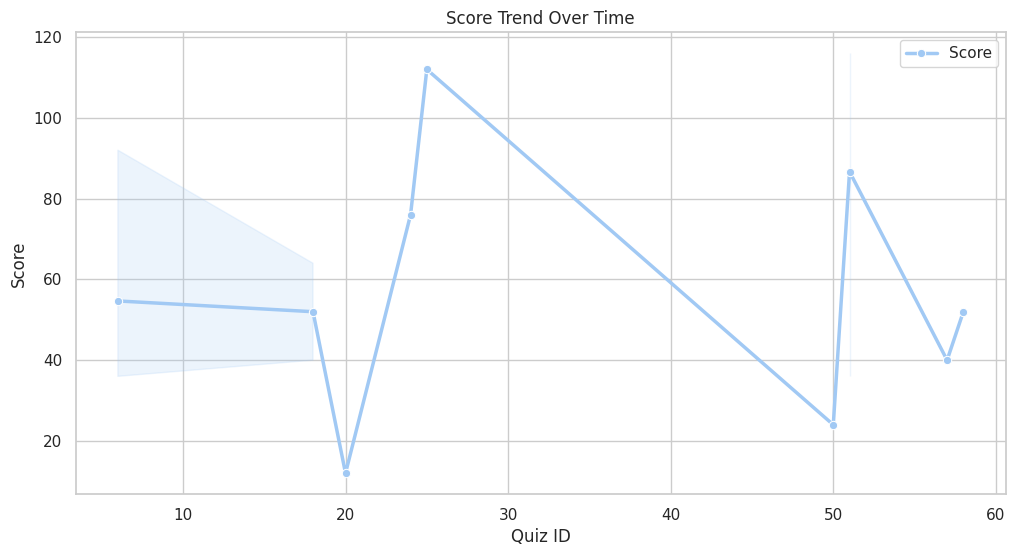

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


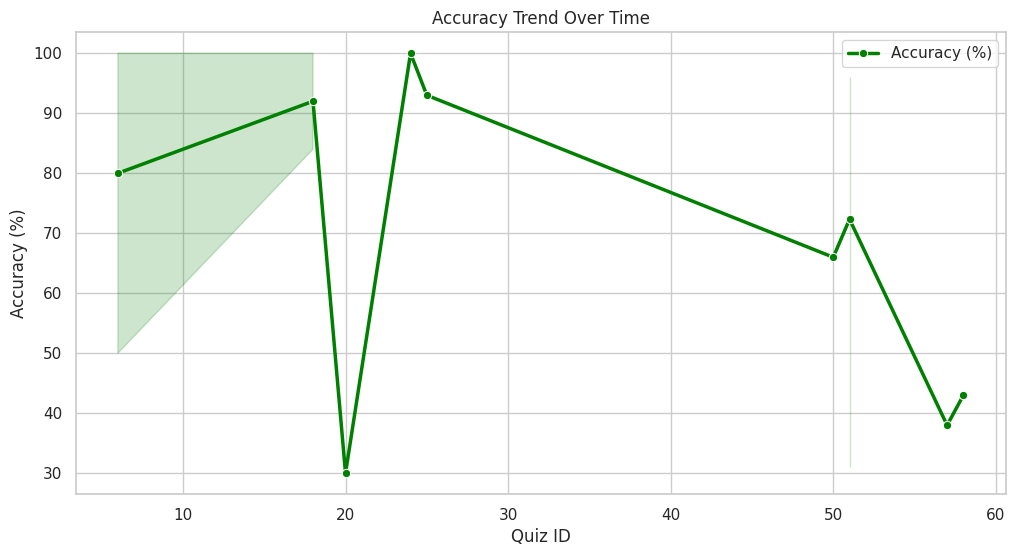


=== ML Model Evaluation ===
Mean Squared Error: 0.00
R^2 Score: 1.00

=== Predicted Future Score ===
Predicted Score: 120.00


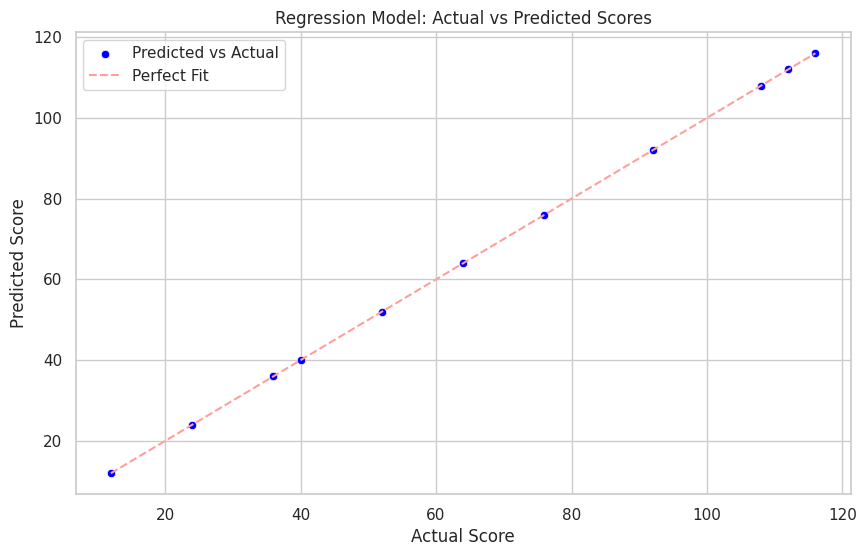


=== Current Quiz Insights ===
Correct Answers: 8
Incorrect Answers: 2
Accuracy (%): 80.0
Final Score: 30.0
Negative Score: 2.0
Topic Analysis: {}

=== Historical Trends ===
Average Score: 60.29
Average Accuracy (%): 72.21
Average Negative Score: 5.86
Average Correct Answers: 15.07
Average Incorrect Answers: 5.86

=== Personalized Recommendations ===
- You are losing marks due to negative marking. Avoid guessing on difficult questions.
- Take mock tests regularly to improve time management and reduce mistakes.


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# 1. Load Data
# -----------------------------

# File paths
quiz_submission_file = "/kaggle/input/json-files/quizsubmission.json"
historical_data_file = "/kaggle/input/json-files/historicaldata.json"
quiz_endpoint_file = "/kaggle/input/json-files/quizendpoint.json"

# Load JSON files
with open(quiz_submission_file, 'r') as f:
    quiz_submission_data = json.load(f)

with open(historical_data_file, 'r') as f:
    historical_data = json.load(f)

with open(quiz_endpoint_file, 'r') as f:
    quiz_endpoint_data = json.load(f)

# -----------------------------
# 2. Analyze Current Quiz Data
# -----------------------------

def analyze_current_quiz(quiz_submission, quiz_endpoint):
    """
    Analyze the latest quiz submission and provide insights.
    """
    insights = {}
    correct_answers = quiz_submission["correct_answers"]
    incorrect_answers = quiz_submission["incorrect_answers"]
    accuracy = float(quiz_submission["accuracy"].replace("%", ""))
    final_score = float(quiz_submission["final_score"])

    # Basic insights
    insights["Correct Answers"] = correct_answers
    insights["Incorrect Answers"] = incorrect_answers
    insights["Accuracy (%)"] = accuracy
    insights["Final Score"] = final_score
    insights["Negative Score"] = float(quiz_submission["negative_score"])
    insights["Topic Analysis"] = {}  # Placeholder for future analysis

    return insights

current_quiz_insights = analyze_current_quiz(quiz_submission_data, quiz_endpoint_data)

# -----------------------------
# 3. Analyze Historical Quiz Data
# -----------------------------

def analyze_historical_quizzes(historical_data):
    """
    Analyze the user's historical quiz data to identify trends and weak areas.
    """
    records = []
    for submission in historical_data:
        accuracy = float(submission["accuracy"].replace("%", ""))
        records.append({
            "Quiz ID": submission["quiz_id"],
            "Score": submission["score"],
            "Accuracy": accuracy,
            "Correct Answers": submission["correct_answers"],
            "Incorrect Answers": submission["incorrect_answers"],
            "Final Score": float(submission["final_score"]),
            "Negative Score": float(submission["negative_score"]),
        })
    
    df = pd.DataFrame(records)
    
    # Calculate trends
    trends = {
        "Average Score": df["Score"].mean(),
        "Average Accuracy (%)": df["Accuracy"].mean(),
        "Average Negative Score": df["Negative Score"].mean(),
        "Average Correct Answers": df["Correct Answers"].mean(),
        "Average Incorrect Answers": df["Incorrect Answers"].mean(),
    }
    
    return df, trends

historical_df, historical_trends = analyze_historical_quizzes(historical_data)

# -----------------------------
# 4. Visualization
# -----------------------------

def plot_historical_performance(df):
    """
    Plot historical quiz performance trends.
    """
    sns.set_theme(style="whitegrid", palette="pastel")

    # Score Trend
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Quiz ID", y="Score", data=df, marker='o', label='Score', linewidth=2.5)
    plt.title("Score Trend Over Time")
    plt.xlabel("Quiz ID")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Accuracy Trend
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Quiz ID", y="Accuracy", data=df, marker='o', label='Accuracy (%)', linewidth=2.5, color='green')
    plt.title("Accuracy Trend Over Time")
    plt.xlabel("Quiz ID")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_historical_performance(historical_df)

# -----------------------------
# 5. Generate Recommendations
# -----------------------------

def generate_recommendations(current_insights, trends):
    """
    Generate personalized recommendations based on insights and trends.
    """
    recommendations = []

    # Current performance suggestions
    if current_insights["Accuracy (%)"] < 70:
        recommendations.append("Your accuracy is below 70%. Focus on understanding the concepts behind incorrect answers.")

    # Historical performance trends
    if trends["Average Accuracy (%)"] < 70:
        recommendations.append("Historical data shows low accuracy. Focus on revising topics with repeated mistakes.")

    if trends["Average Negative Score"] > 5:
        recommendations.append("You are losing marks due to negative marking. Avoid guessing on difficult questions.")

    # Generic suggestions
    recommendations.append("Take mock tests regularly to improve time management and reduce mistakes.")
    return recommendations

recommendations = generate_recommendations(current_quiz_insights, historical_trends)

# -----------------------------
# 6. Train ML Model
# -----------------------------

def train_score_prediction_model(df):
    """
    Train a Linear Regression model to predict quiz scores based on historical data.
    """
    # Features and target
    features = df[["Accuracy", "Correct Answers", "Incorrect Answers", "Negative Score"]]
    target = df["Score"]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("\n=== ML Model Evaluation ===")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    
    return model

score_model = train_score_prediction_model(historical_df)

# -----------------------------
# 7. Predict Future Scores
# -----------------------------

def predict_future_scores(model, accuracy, correct_answers, incorrect_answers, negative_score):
    """
    Use the trained model to predict a future quiz score based on given parameters.
    """
    input_data = pd.DataFrame({
        "Accuracy": [accuracy],
        "Correct Answers": [correct_answers],
        "Incorrect Answers": [incorrect_answers],
        "Negative Score": [negative_score]
    })
    predicted_score = model.predict(input_data)[0]
    return predicted_score

future_score = predict_future_scores(score_model, accuracy=85, correct_answers=30, incorrect_answers=5, negative_score=2)
print(f"\n=== Predicted Future Score ===\nPredicted Score: {future_score:.2f}")

# -----------------------------
# 8. Regression Model Plot
# -----------------------------

def plot_model_performance(df, model):
    """
    Plot the model's performance and feature importance.
    """
    # Features and target
    features = df[["Accuracy", "Correct Answers", "Incorrect Answers", "Negative Score"]]
    target = df["Score"]
    predictions = model.predict(features)

    # Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=target, y=predictions, color="blue", label="Predicted vs Actual")
    plt.plot([target.min(), target.max()], [target.min(), target.max()], '--r', label="Perfect Fit")
    plt.title("Regression Model: Actual vs Predicted Scores")
    plt.xlabel("Actual Score")
    plt.ylabel("Predicted Score")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_model_performance(historical_df, score_model)

# -----------------------------
# 9. Output Results
# -----------------------------

print("\n=== Current Quiz Insights ===")
for k, v in current_quiz_insights.items():
    print(f"{k}: {v}")

print("\n=== Historical Trends ===")
for k, v in historical_trends.items():
    print(f"{k}: {v:.2f}")

print("\n=== Personalized Recommendations ===")
for rec in recommendations:
    print(f"- {rec}")
